In [27]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans # 用于验证复现正确性

In [30]:
iris_dataset = load_iris()
data = iris_dataset["data"][:, :2]
K = 3

In [11]:
class myKMeans():
    ''' 复现KMeans代码

    参数
    --------------------

    n_clusters : int, default=3
        聚类个数以及选择中心点的个数
    
    max_iter : int, default=100
        一次聚类的迭代次数

    tol : float, default=1e-4
        前后中心点差距的临界值，用于判断是否收敛
    
    random_state : int, default=None
        生成随机中心点时使用的种子

    属性
    --------------------
    cluster_center_ : ndarray of shape (n_clusters, n_features)
        聚类中心点的坐标

    labels_ : ndarray of shape (n_samples,)
        每个点的聚类标签
    
    '''
    cluster_center_ : np.ndarray
    labels_ : np.ndarray


    def __init__(
        self,
        n_clusters = 3,
        max_iter = 100,
        tol = 1e-4,
        random_state = None
    ) -> None:
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state


    def _kmeans_plusplus(
        self, X, n_clusters
    ):
        '''使用KMeans++算法选取聚类初始点

        参数
        --------------------
        X : ndarray of shape (n_samples, n_features)
            需要选取的数据

        n_clusters : int, default=3
            选择中心点的个数
        
        返回
        --------------------
        centers : ndarray of shape (n_clusters, n_features)
            KMeans算法的初始中心点
        
        indices : ndarray of shape (n_clusters,)
            得到的中心点在X中的位置
        '''
        n_samples, n_features = X.shape

        centers = np.empty((n_clusters, n_features), dtype=X.dtype)

        indices = np.full(n_clusters, -1, dtype=int)

        # 随机挑选第一个中心点的坐标
        center_id = np.random.randint(0, n_samples)
        centers[0] = X[center_id]
        indices[0] = center_id

        # 挑选剩余中心点
        for c in range(1, n_clusters):
            d_min = []
            # 计算每一个点到已知中心点的最短距离
            for p in range(n_samples):
                dists = np.sum((centers[: c] - X[p]) ** 2, axis=1)
                d_min.append(np.min(dists))

            d_min = np.array(d_min)
            # 距离已知点越远，越有可能作为初始点
            prob = d_min / np.sum(d_min)
            new_c_idx = np.random.choice(n_samples, p=prob)

            centers[c] = X[new_c_idx]
            indices[c] = new_c_idx

        return centers, indices


    def fit(self, X):
        '''计算KMeans聚类结果
        
        参数
        --------------------
        X : ndarray of shape (n_samples, n_features)

        返回
        --------------------
        self : object
            Fitted estimator.
        '''
        n_samples, n_features = X.shape

        # 构造初始中心点
        centers_init, _ = self._kmeans_plusplus(X, self.n_clusters)

        best_centers = centers_init
        best_labels = []

        for i in range(self.max_iter):
            best_labels = []
            point_each_class = [np.empty((0, n_features))] * self.n_clusters
            # 更新中心点
            for p in range(n_samples):
                # 将每个点归到最近的中心点的类中
                dists = np.sum((best_centers - X[p]) ** 2, axis=1)
                class_ = np.argmin(dists)
                best_labels.append(class_)
                point_each_class[class_] = np.vstack((point_each_class[class_], X[p]))

            new_centers = np.empty((self.n_clusters, n_features), dtype=X.dtype)

            # 计算新的中心点坐标
            for eachClass in range(self.n_clusters):
                new_centers[eachClass] = np.mean(point_each_class[eachClass], axis=0)

            if np.sum((best_centers - new_centers) ** 2) < self.tol:
                self.cluster_center_ = new_centers
                self.labels_ = best_labels
                break
            
            best_centers = new_centers

        return self

In [38]:
model = myKMeans()

model.fit(data)

result = np.array(model.labels_)

In [39]:
model_true = KMeans(n_clusters=K, init="k-means++", n_init='auto', algorithm='elkan')

model_true.fit_predict(data)

result_true = np.array(model.labels_)

[]

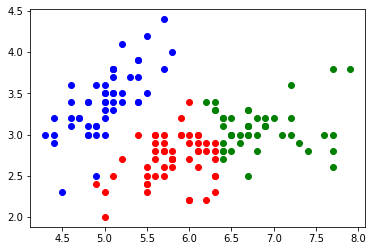

In [41]:
color = ["red", "green", "blue"]
for i in range(K):
    plt.scatter(data[result == i][:, 0], data[result == i][:, 1], color=color[i])
plt.plot()

[]

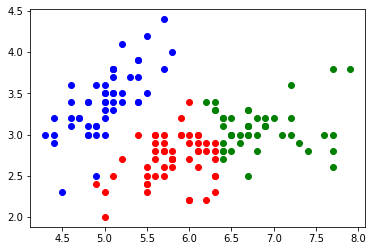

In [42]:
color = ["red", "green", "blue"]
for i in range(K):
    plt.scatter(data[result_true == i][:, 0], data[result_true == i][:, 1], color=color[i])
plt.plot()